<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Classification Art Category</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            align-items: center;
            background-color: #000;
            color: white;
        }
        h1 {
            font-size: 5em;
            font-weight: bold;
            text-align: center;
        }
    </style>
</head>
<body>
    <h1>Classification Art Category</h1>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sommaire - Classification Art</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-color: #000;
            color: white;
            font-family: Arial, sans-serif;
        }
        h1 {
            font-weight: bold;
            text-align: center;
            margin-bottom: 20px;
            font-size: 3em;
        }
        ul {
            list-style-type: none;
            text-align: center;
            font-size: 2em;
            line-height: 2em;
            margin: 0;
            padding: 0;
        }
    </style>
</head>
<body>
    <h1>Sommaire</h1>
    <ul>
        <li>1. Présentation de la base de données</li>
        <li>2. DataLoader et Data Augmentation</li>
        <li>3. Reseau FC</li>
        <li>4. Reseau CNN</li>
        <li>5. Transfer Learning</li>
    </ul>
</body>
</html>

# **Introduction**

- Le projet **P1 - Projet de classification** a pour objectif de développer une solution permettant de classifier des images dans des catégories originales définies par l'utilisateur. Dans le cadre de ce projet, notre thématique est la reconnaissance des mouvements d'art.

- Les mouvements d'art que nous avons choisis sont au nombre de 13, comprenant des catégories variées telles que **Realism**, **Japanese art**, **Symbolism**, **Expressionism**, entre autres. Chaque mouvement artistique possède des caractéristiques visuelles et esthétiques distinctes, ce qui en fait un défi intéressant pour une classification automatisée.

- Une fois la base d'images définie et validée, les étapes suivantes consistent à exploiter des outils et techniques avancés pour préparer et entraîner les modèles. Cela inclut la mise en place d'un **DataLoader** et l'utilisation de techniques de **Data Augmentation** pour enrichir les données d'entraînement. Les performances des modèles sont ensuite analysées en utilisant différents types de réseaux : les réseaux entièrement connectés (FC), les réseaux convolutifs (CNN), et enfin, le Transfer Learning avec des architectures pré-entraînées comme MobileNetV2.

# **Présentation de la base de données**

Lors du lancement du projet, nous avons cherché des mouvements d'art adéquats pour notre thématique. L'idée était de se concentrer principalement sur des mouvements liés à la peinture afin de faciliter la tâche de classification et d'éviter différents types d'art tels que la sculpture, la poterie ou autres. 

Sachant que nous faisions face à notre première contrainte liée à la nécessité d'avoir un nombre de classes supérieur à 8, nous avons identifié un total de 13 mouvements d'art différents. Ces mouvements varient en popularité, allant du **Symbolism** au **Baroque**. Parmi ces mouvements, on retrouve divers thèmes récurrents tels que l'humain, la nature, et la religion. Par exemple, dans le cadre des peintures centrées sur l'humain, les œuvres du **Rococo** et du **Romanticism** mettent particulièrement en avant des représentations de figures humaines dans des contextes variés.

Nous avons ensuite recherché suffisamment d'exemples de peintures pour garantir l'efficacité de notre modèle. L'objectif fixé était de collecter 600 peintures par catégorie. Malgré la difficulté à atteindre cet objectif pour certains mouvements moins communs comme le **Rococo**, nous avons réussi à finaliser notre base de données grâce à des sources telles que Flickr, qui a été une ressource majeure dans cette collecte.


## **Collecte des images**

La collecte des différentes images pour constituer notre base de données a nécessité plus de deux semaines de travail, totalisant environ une quinzaine d'heures de recherche active.

Cependant, certains mouvements d'art étaient particulièrement difficiles à compléter, notamment en raison de leur moindre popularité. Pour pallier ces difficultés, nous avons consacré entre 1 et 2 heures supplémentaires à explorer d'autres moyens de collecte, tels que des bases publiques alternatives ou des recherches manuelles sur des plateformes d'images. Ces efforts ont permis de garantir une base de données équilibrée, toujours avec cet objectif de 600 images par catégorie.

In [1]:
import collections
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import artlib
import os

NUM_CLASSES = 13
INPUT_SHAPE = (224,224)
INPUT_SHAPE_CNN = (128,128)
BATCH_SIZE = 64
DATASET_PATH = 'dataset_600'

classes = [d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))]
classes

['Academic_Art',
 'Art_Nouveau',
 'Baroque',
 'Expressionism',
 'Japanese_Art',
 'Neoclassicism',
 'Primitivism',
 'Realism',
 'Renaissance',
 'Rococo',
 'Romanticism',
 'Symbolism',
 'Western_Medieval']

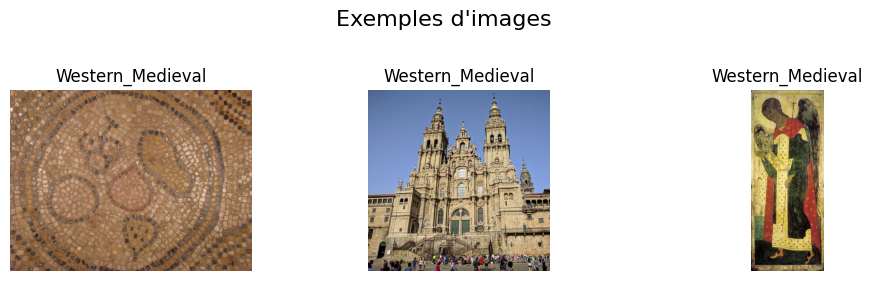

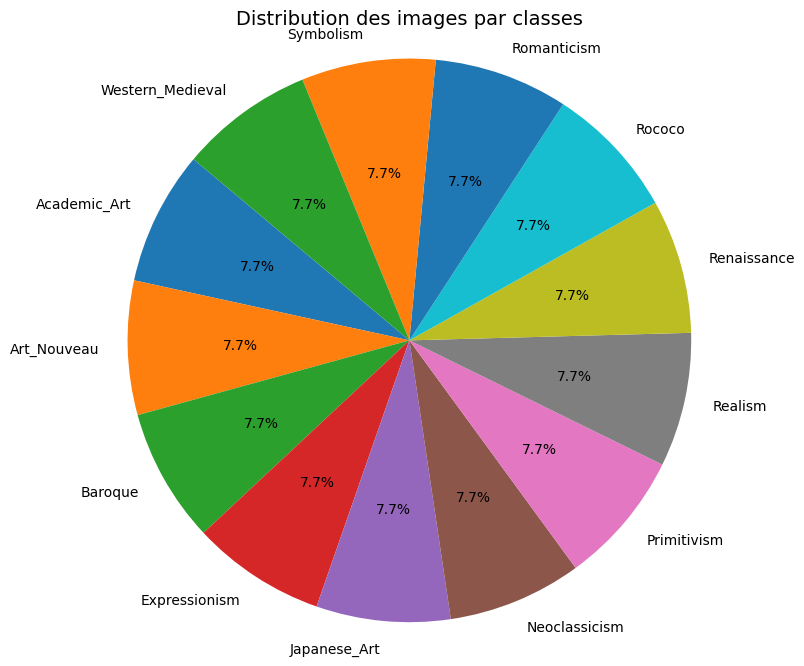

In [2]:
sample_images,class_counts = artlib.sample_images_class_count()
artlib.show_sample_images(sample_images)
artlib.plot_pie_chart(class_counts)

# **DataLoader et DataAugmentation** 

### **Mise en place du DataLoader**

- **Chargement des données :** Utilisation de image_dataset_from_directory pour charger les images du répertoire, avec redimensionnement automatique à ```128x128 pixels```.

- **Ensembles d'entraînement/validation :** Division automatique ```(80%/20%)``` des données grâce à l'argument validation_split.

- **Classes détectées :** Identification automatique des mouvements d'art via les noms des sous-dossiers.

- **Batching :** Création de lots de ```64 images```, prêts pour le processus d'apprentissage.

- **Visualisation :** Fonction show_samples pour afficher un batch d'images avec leurs étiquettes pour validation visuelle.

In [3]:
train, valid = image_dataset_from_directory(
                        directory = DATASET_PATH,
                        batch_size=BATCH_SIZE,
                        image_size=INPUT_SHAPE,
                        validation_split=0.2,
                        subset='both',
                        seed = 14
            )

train_cnn, valid_cnn = image_dataset_from_directory(
                        directory = DATASET_PATH,
                        batch_size=BATCH_SIZE,
                        image_size=INPUT_SHAPE_CNN,
                        validation_split=0.2,
                        subset='both',
                        seed = 14
            )

Found 7800 files belonging to 13 classes.
Using 6240 files for training.
Using 1560 files for validation.
Found 7800 files belonging to 13 classes.
Using 6240 files for training.
Using 1560 files for validation.


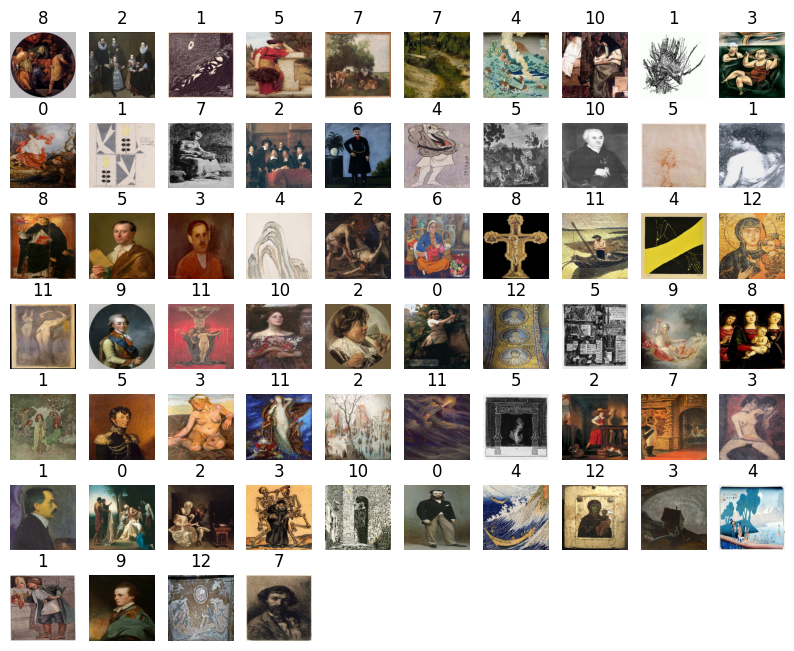

In [4]:
artlib.ShowSamples(train)

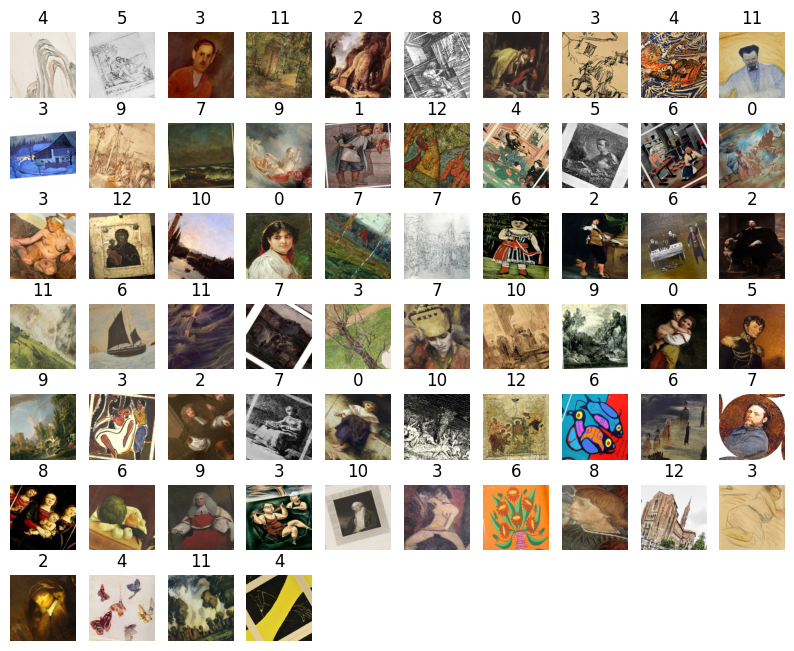

In [5]:
data_augmentation_layers = [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
]

def data_augmentation(images):
        for layer in data_augmentation_layers:
                images = layer(images)
        return images

augmented_train = train.map( lambda x, y: (data_augmentation(x), y))
augmented_train_cnn = train_cnn.map( lambda x, y: (data_augmentation(x), y))

artlib.ShowSamples(augmented_train)

L'image montre un batch de ```64 échantillons```, ce qui correspond à la taille de lot spécifiée lors de la configuration du DataLoader. Ces images appartiennent à l'une des ```13 classes``` représentant les différents mouvements d'art, avec des étiquettes numériques allant de 0 à 12, identifiant chaque mouvement.

Cependant, sans connaissances approfondies en histoire de l'art, il peut être difficile de distinguer à quel mouvement certaines œuvres appartiennent. Cela s'explique par les similarités visuelles entre les œuvres de différents mouvements, notamment en ce qui concerne les thèmes récurrents (par exemple, les représentations humaines ou naturelles), les palettes de couleurs similaires ou les styles artistiques proches.

In [6]:
class_names = valid.class_names

# **Réseau - FC**

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
epochs = [3]

print("✅ INPUT_SHAPE utilisé :", INPUT_SHAPE)
for x, y in train.take(1):
    print("✅ Shape des entrées :", x.shape, "| Type :", x.dtype)

hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
df_results_fc, best_model_fc, best_history_fc = artlib.train_all_models(
    model_type="FC",
    hyperparams=hyperparams,
    train=train,
    valid=valid,
    augmented_train=augmented_train
)

✅ INPUT_SHAPE utilisé : (224, 224)
✅ Shape des entrées : (64, 224, 224, 3) | Type : <dtype: 'float32'>
🔍 Entraînement avec les paramètres : {'epochs': 3, 'learning_rate': 0.01, 'dropout': True, 'data_augmentation': True}
🚀 Initialisation du modèle FC...
📊 Début de l'entraînement...
Epoch 1/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 673ms/step - accuracy: 0.1180 - loss: 2.7786 - val_accuracy: 0.0808 - val_loss: 3.3320
Epoch 2/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 692ms/step - accuracy: 0.1631 - loss: 2.4457 - val_accuracy: 0.1955 - val_loss: 2.3987
Epoch 3/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 678ms/step - accuracy: 0.1879 - loss: 2.4000 - val_accuracy: 0.2006 - val_loss: 2.3643
✅ Entraînement terminé.
🔍 Entraînement avec les paramètres : {'epochs': 3, 'learning_rate': 0.01, 'dropout': True, 'data_augmentation': False}
🚀 Initialisation du modèle FC...
📊 Début de l'entraînement...
Epoch 1/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 494ms/step - accuracy: 0.1435 - loss: 2.7198 - val_accuracy: 0.1282 - val_loss: 2.9935


In [8]:
df_sorted_fc = df_results_fc.sort_values(by="final_val_accuracy", ascending=False)
df_sorted_fc

,epochs,learning_rate,dropout,data_augmentation,final_loss,final_accuracy,final_val_loss,final_val_accuracy
3,3,0.0100,False,False,2.270737,0.245353,2.340413,0.225641
5,3,0.0010,True,False,2.483797,0.174840,2.381491,0.210256
6,3,0.0010,False,True,2.272502,0.251923,2.388916,0.210256
1,3,0.0100,True,False,2.361287,0.207212,2.334991,0.207692
2,3,0.0100,False,True,2.347768,0.210096,2.385230,0.207051
0,3,0.0100,True,True,2.387388,0.192788,2.364305,0.200641
10,3,0.0001,False,True,2.299327,0.244551,2.444892,0.199359
7,3,0.0010,False,False,2.175946,0.286699,2.462517,0.196795
4,3,0.0010,True,True,2.501622,0.167628,2.404531,0.194231
8,3,0.0001,True,True,2.791126,0.145192,2.530678,0.187179


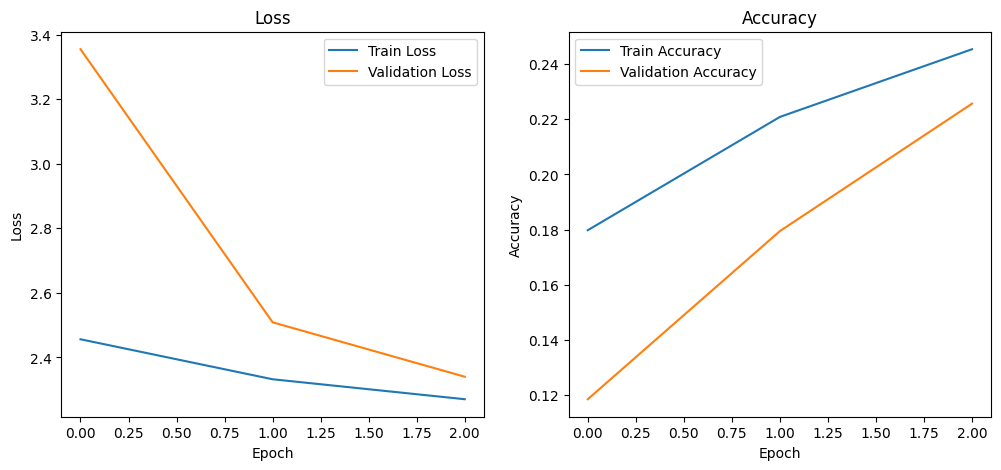

In [14]:
# Affichage des courbes d'apprentissage
artlib.plot_training_curves(best_history_fc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step
Forme initiale de y_true : (1560,)
Les étiquettes sont déjà sous forme d'entiers.


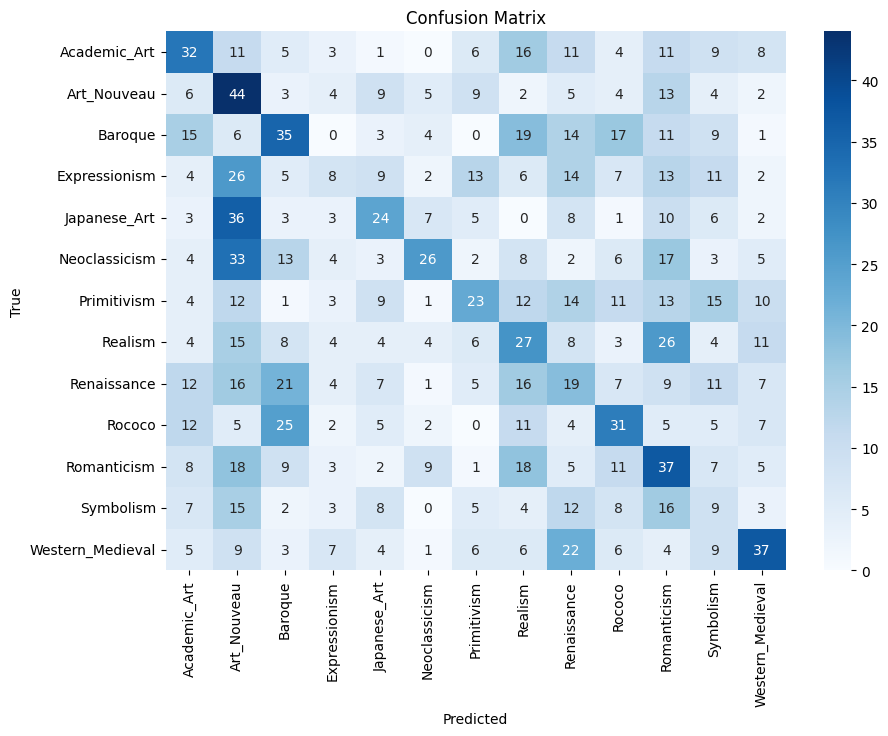

In [10]:
# Affichage de la matrice de confusion
artlib.plot_confusion_matrix(best_model_fc, valid, class_names)

In [11]:
# Affichage du rapport de classification
artlib.plot_classification_report(best_model_fc, valid, class_names)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step
Rapport de classification:
                  precision    recall  f1-score   support

    Academic_Art       0.28      0.27      0.27       117
     Art_Nouveau       0.18      0.40      0.25       110
         Baroque       0.26      0.26      0.26       134
   Expressionism       0.17      0.07      0.10       120
    Japanese_Art       0.27      0.22      0.24       108
   Neoclassicism       0.42      0.21      0.28       126
     Primitivism       0.28      0.18      0.22       128
         Realism       0.19      0.22      0.20       124
     Renaissance       0.14      0.14      0.14       135
          Rococo       0.27      0.27      0.27       114
     Romanticism       0.20      0.28      0.23       133
       Symbolism       0.09      0.10      0.09        92
Western_Medieval       0.37      0.31      0.34       119

        accuracy                           0.23      1560
       macro avg       0.24      0.23      0.22      1560
  

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step


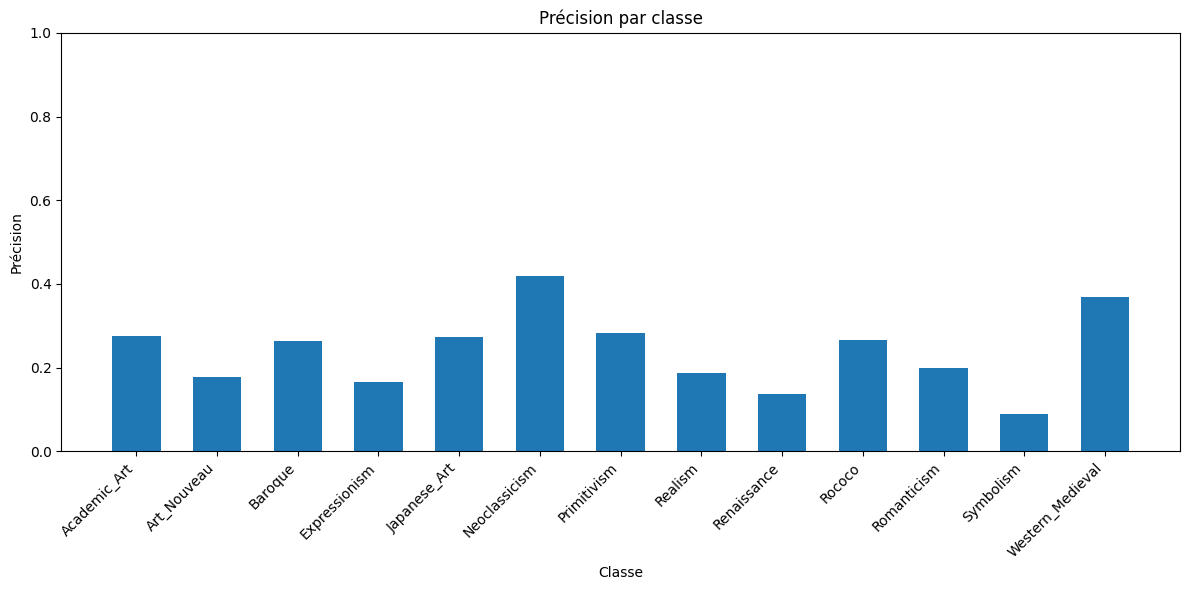

In [12]:
# Affichage de la précision par classe
artlib.plot_precision_by_class(best_model_fc, valid, class_names)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step


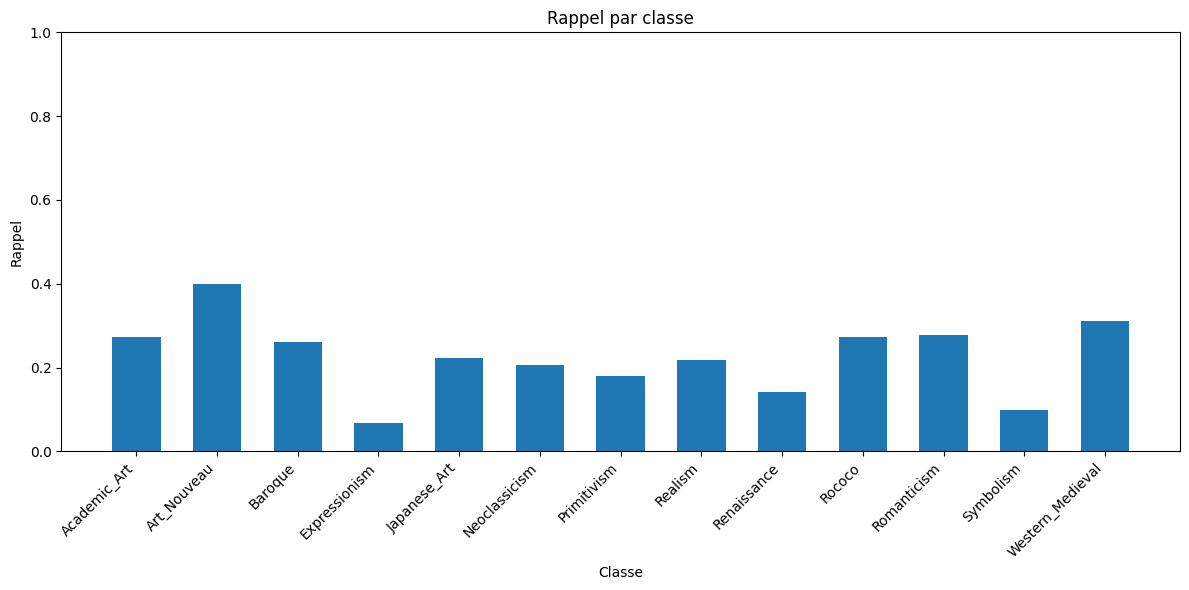

In [13]:
# Affichage du rappel par classe
artlib.plot_recall_by_class(best_model_fc, valid, class_names)

# **Réseau - CNN**

In [15]:
learning_rates = [0.01, 0.001, 0.0001]
epochs = [4]

hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
df_results_cnn, best_model_cnn, best_history_cnn = artlib.train_all_models(
    model_type="CNN",
    hyperparams=hyperparams,
    train=train,
    valid=valid,
    augmented_train=augmented_train
)

🔍 Entraînement avec les paramètres : {'epochs': 4, 'learning_rate': 0.01, 'dropout': True, 'data_augmentation': True}
🚀 Initialisation du modèle CNN...
📊 Début de l'entraînement...
Epoch 1/4
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 675ms/step - accuracy: 0.1359 - loss: 2.7673 - val_accuracy: 0.1179 - val_loss: 3.3796
Epoch 2/4
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 659ms/step - accuracy: 0.1733 - loss: 2.4484 - val_accuracy: 0.1859 - val_loss: 2.4572
Epoch 3/4
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 665ms/step - accuracy: 0.1858 - loss: 2.3961 - val_accuracy: 0.2154 - val_loss: 2.3270
Epoch 4/4
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 668ms/step - accuracy: 0.2082 - loss: 2.3627 - val_accuracy: 0.1981 - val_loss: 2.3173
✅ Entraînement terminé.
🔍 Entraînement avec les paramètres : {'epochs': 4, 'learning_rate': 0.01, 'dropout': True, 'data_augmentation': False}
🚀 Initialisation du modèle CNN...
📊 Début de l'entraînement...
Epoch 1/4
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 494ms/step - accuracy: 0.1343 - loss: 2.7481 - val_accuracy:

In [16]:
df_sorted_cnn = df_results_cnn.sort_values(by="final_val_accuracy", ascending=False)
df_sorted_cnn

,epochs,learning_rate,dropout,data_augmentation,final_loss,final_accuracy,final_val_loss,final_val_accuracy
1,4,0.0100,True,False,2.322110,0.218429,2.300634,0.234615
10,4,0.0001,False,True,2.249690,0.258814,2.461076,0.219872
3,4,0.0100,False,False,2.259227,0.241827,2.340982,0.219231
6,4,0.0010,False,True,2.266018,0.248558,2.348269,0.210897
5,4,0.0010,True,False,2.407122,0.195673,2.337151,0.209615
4,4,0.0010,True,True,2.455058,0.191987,2.349504,0.204487
8,4,0.0001,True,True,2.794514,0.148077,2.468146,0.201923
0,4,0.0100,True,True,2.350559,0.211378,2.317328,0.198077
9,4,0.0001,True,False,2.619512,0.185256,2.497937,0.196154
2,4,0.0100,False,True,2.287573,0.234776,2.387912,0.191667


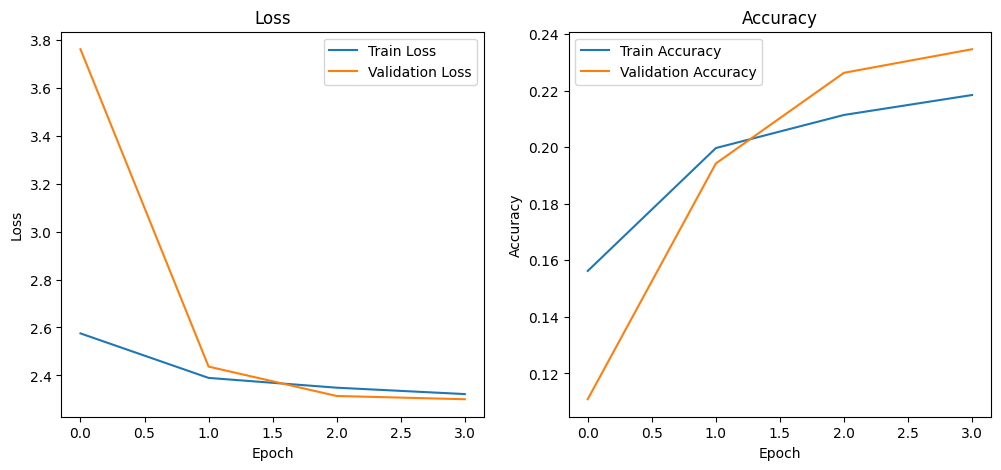

In [18]:
# Affichage des courbes d'apprentissage
artlib.plot_training_curves(best_history_cnn)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step
Forme initiale de y_true : (1560,)
Les étiquettes sont déjà sous forme d'entiers.


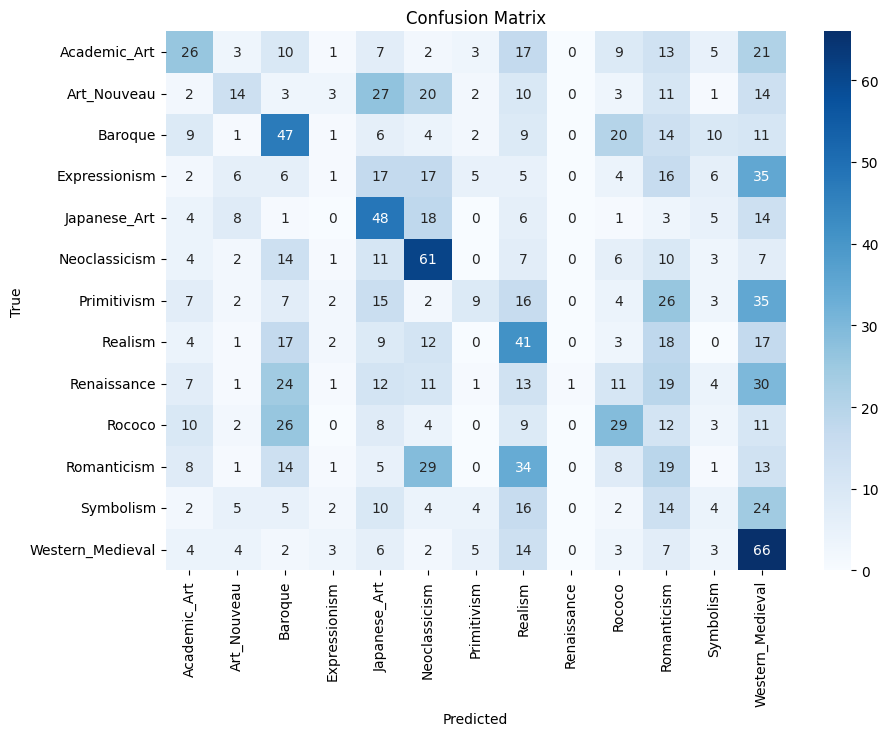

In [22]:
# Affichage de la matrice de confusion
artlib.plot_confusion_matrix(best_model_cnn, valid, class_names)

In [23]:
# Affichage du rapport de classification
artlib.plot_classification_report(best_model_cnn, valid, class_names)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step
Rapport de classification:
                  precision    recall  f1-score   support

    Academic_Art       0.29      0.22      0.25       117
     Art_Nouveau       0.28      0.13      0.17       110
         Baroque       0.27      0.35      0.30       134
   Expressionism       0.06      0.01      0.01       120
    Japanese_Art       0.27      0.44      0.33       108
   Neoclassicism       0.33      0.48      0.39       126
     Primitivism       0.29      0.07      0.11       128
         Realism       0.21      0.33      0.26       124
     Renaissance       1.00      0.01      0.01       135
          Rococo       0.28      0.25      0.27       114
     Romanticism       0.10      0.14      0.12       133
       Symbolism       0.08      0.04      0.06        92
Western_Medieval       0.22      0.55      0.32       119

        accuracy                           0.23      1560
       macro avg       0.28      0.23      0.20      1560
  

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step


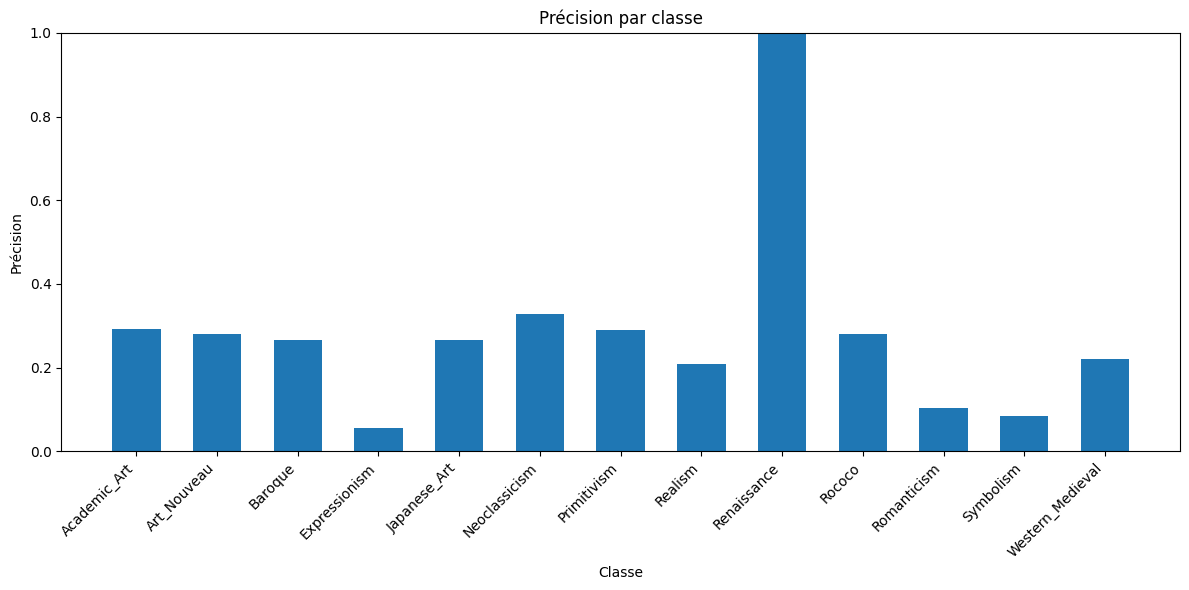

In [24]:
# Affichage de la précision par classe
artlib.plot_precision_by_class(best_model_cnn, valid, class_names)

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step


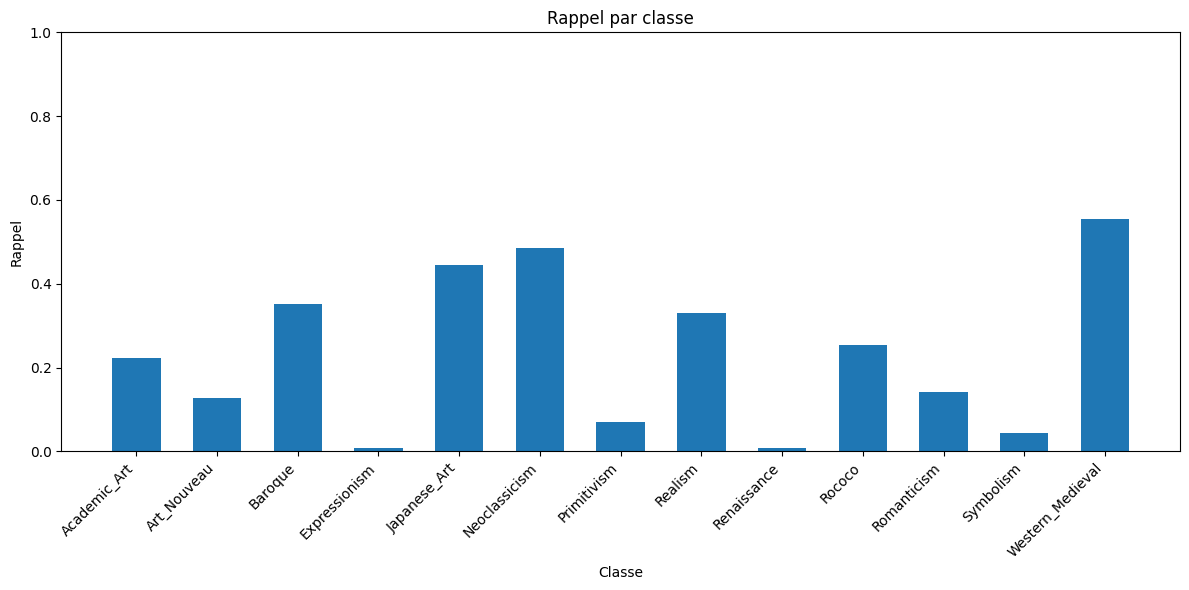

In [25]:
# Affichage du rappel par classe
artlib.plot_recall_by_class(best_model_cnn, valid, class_names)

# **Réseau - TF**

In [ ]:
learning_rates = [0.001, 0.0005, 0.0001]
epochs = [5]

hyperparams = artlib.generate_hyperparameter_combinations(learning_rates,epochs)
df_results_tl, best_model_tl, best_history_tl = artlib.train_all_models(
    model_type="TL",
    hyperparams=hyperparams,
    train=train,
    valid=valid,
    augmented_train=augmented_train
)

🔍 Entraînement avec les paramètres : {'epochs': 5, 'learning_rate': 0.001, 'dropout': True, 'data_augmentation': False}
🚀 Initialisation du modèle TL...
🔄 Prétraitement des données pour Transfer Learning...
📊 Début de l'entraînement...
Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.2334 - loss: 2.9983 - val_accuracy: 0.4609 - val_loss: 1.7312
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.4505 - loss: 1.8354 - val_accuracy: 0.5186 - val_loss: 1.5395
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.5027 - loss: 1.5919 - val_accuracy: 0.5429 - val_loss: 1.4866
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.5295 - loss: 1.4797 - val_accuracy: 0.5385 - val_loss: 1.5021
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.5406 - loss: 1.4530 - val_accuracy: 0.5462 - val_loss: 1.4796
✅ Entraînement terminé.
🏆 Meilleur modèle : 54.62% de final_val_accuracy


In [21]:
df_sorted_tf = df_results_tl.sort_values(by="final_val_accuracy", ascending=False)
df_sorted_tf

,epochs,learning_rate,dropout,data_augmentation,final_loss,final_accuracy,final_val_loss,final_val_accuracy
0,5,0.001,True,False,1.440491,0.544391,1.479601,0.546154


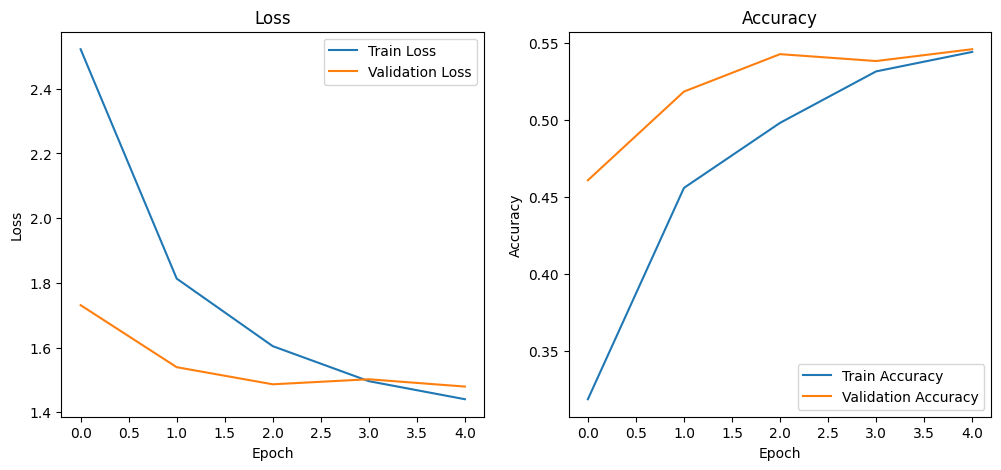

In [24]:
# Affichage des courbes d'apprentissage
artlib.plot_training_curves(best_history_tl)

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input 
valid_preprocess = valid.map(lambda x, y: (preprocess_input(x), y))

25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 929ms/step
Forme initiale de y_true : (1560,)
Les étiquettes sont déjà sous forme d'entiers.


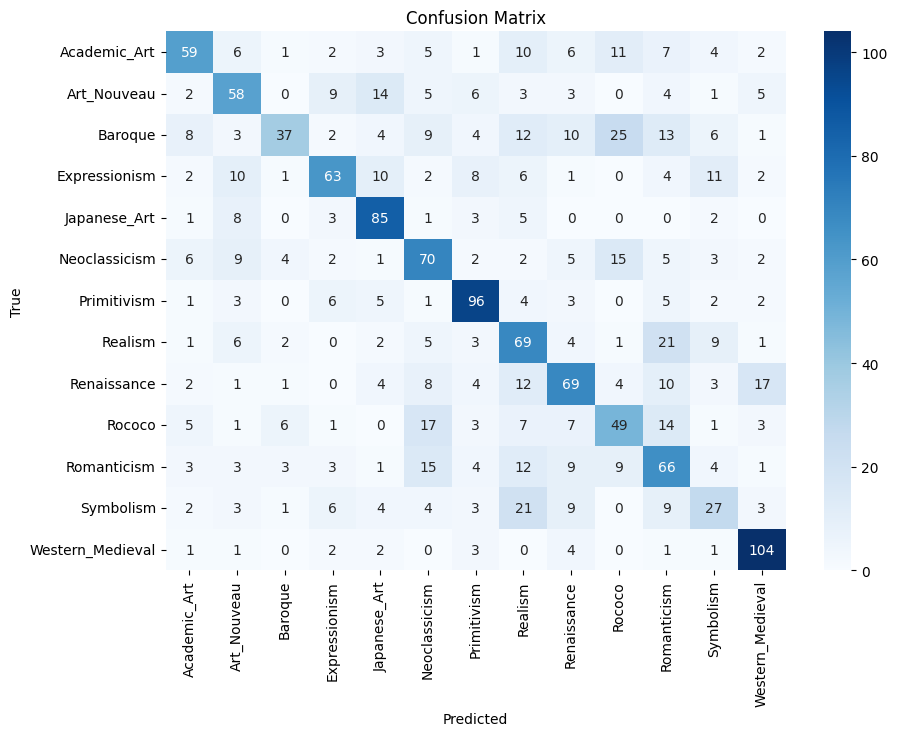

In [25]:
# Affichage de la matrice de confusion
artlib.plot_confusion_matrix(best_model_tl, valid_preprocess, class_names)

In [26]:
# Affichage du rapport de classification
artlib.plot_classification_report(best_model_tl, valid_preprocess, class_names)


25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 920ms/step
Rapport de classification:
                  precision    recall  f1-score   support

    Academic_Art       0.63      0.50      0.56       117
     Art_Nouveau       0.52      0.53      0.52       110
         Baroque       0.66      0.28      0.39       134
   Expressionism       0.64      0.53      0.58       120
    Japanese_Art       0.63      0.79      0.70       108
   Neoclassicism       0.49      0.56      0.52       126
     Primitivism       0.69      0.75      0.72       128
         Realism       0.42      0.56      0.48       124
     Renaissance       0.53      0.51      0.52       135
          Rococo       0.43      0.43      0.43       114
     Romanticism       0.42      0.50      0.45       133
       Symbolism       0.36      0.29      0.33        92
Western_Medieval       0.73      0.87      0.79       119

        accuracy                           0.55      1560
       macro avg       0.55      0.55      0.54      1560
 

25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 898ms/step


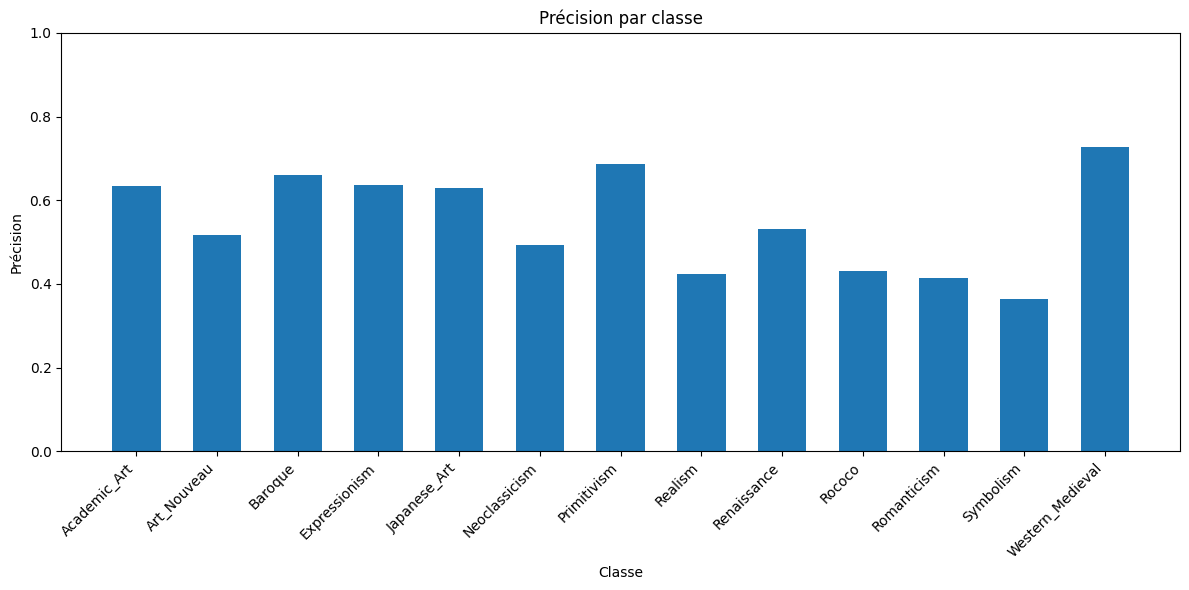

In [30]:
# Affichage de la précision par classe
artlib.plot_precision_by_class(best_model_tl, valid_preprocess, class_names)

25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 921ms/step


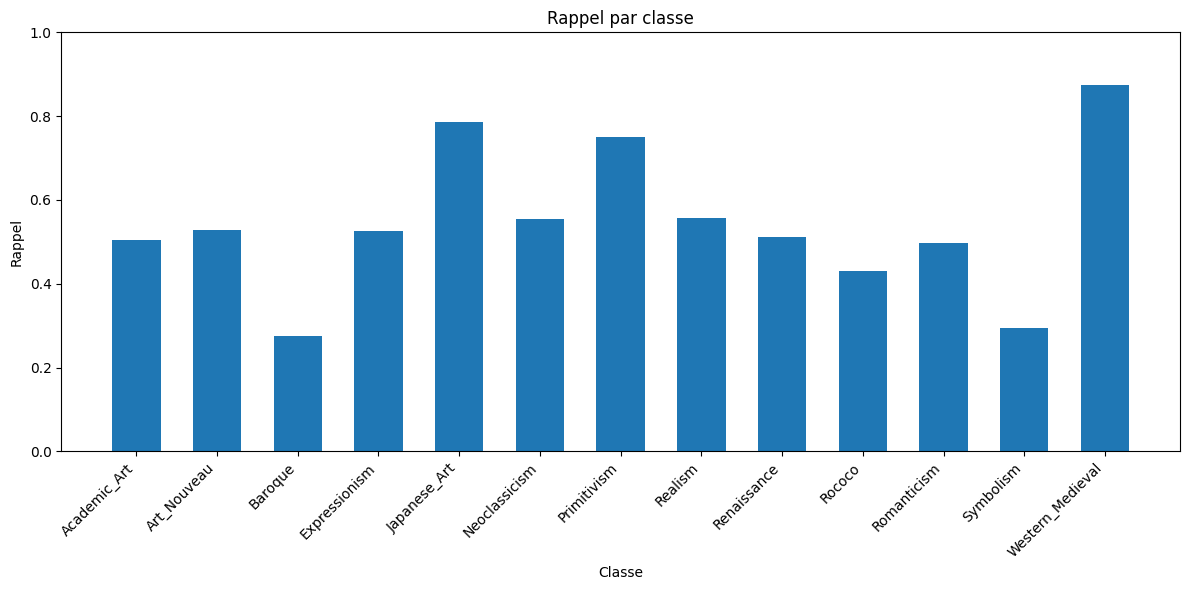

In [32]:
# Affichage du rappel par classe
artlib.plot_recall_by_class(best_model_tl, valid_preprocess, class_names)